In [ ]:
import cv2
import sys
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
imagePath = "drive/My Drive/mascaras/pessoas.jpg"

In [ ]:

# os.listdir(dir_path)

In [ ]:
# dir_path = 'drive/My Drive/mascaras/archive (2)/Full_Dataset/Full_Dataset/Images/video_31_01_2022_2 (90).jpg'
# dir_path = 'drive/My Drive/mascaras//archive (2)/Full_Dataset/Full_Dataset/Images'
dir_path = 'drive/My Drive/mascaras/archive (2)/Training/Training/Images/'
dir_path_label = 'drive/My Drive/mascaras/archive (2)/Training/Training/Labels/'
dir_to_save = "drive/My Drive/mascaras/only_faces_images/"


#### Para executar no computador Lara

In [ ]:
dir_path = '/content/drive/MyDrive/Colab/Visao_Computacional/limpando_a_base/Images/'
dir_path_label = '/content/drive/MyDrive/Colab/Visao_Computacional/limpando_a_base/Labels/'
dir_to_save = "/content/drive/MyDrive/Colab/Visao_Computacional/limpando_a_base/base_limpa_testing/"

In [ ]:
n_faces = []
found = 0
not_found = 0
index = 0 
for imagePath in os.listdir(dir_path)[0:500]:
  label_Path = dir_path_label  +imagePath 
  image = cv2.imread(dir_path  +imagePath)
  try:
    f = open(label_Path.replace("jpg", "txt"), "r")
  
  except:
    print("txt file not found")
  found += 1
  label = f.read()
  label_real = label.split(" ")[0]
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  faces = faceCascade.detectMultiScale(
          gray,
          scaleFactor=1.3,
          minNeighbors=3,
          minSize=(30, 30)
  ) 



  for (x, y, w, h) in faces:
      cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
      image_crop = image[y:y+h, x:x+w]
      cv2.imwrite(dir_to_save + "/" + label_real + "_" + str(index) + ".jpg", image_crop)
      index += 1


  # print("Found {0} Faces!".format(len(faces)))
  n_faces.append(len(faces))

  # salvando imagens 


# a partir daqui nao precisa

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

a = pd.Series(n_faces).value_counts()
a
# plt.hist(n_faces)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


()                                                              163
[[110, 695, 53, 53], [406, 722, 96, 96], [124, 836, 72, 72]]      1
[[448, 219, 57, 57], [485, 223, 69, 69]]                          1
[[356, 115, 52, 52]]                                              1
[[356, 62, 116, 116]]                                             1
                                                               ... 
[[224, 8, 53, 53], [540, 573, 116, 116]]                          1
[[390, 89, 103, 103]]                                             1
[[236, 223, 54, 54]]                                              1
[[325, 202, 74, 74]]                                              1
[[542, 666, 96, 96]]                                              1
Length: 338, dtype: int64

In [ ]:
from sklearn.preprocessing import on

In [ ]:
from google.colab.patches import cv2_imshow
for face in faces:
  cv2.imshow(face)

NameError: ignored

In [ ]:
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    image_crop = image[y:y+h, x:x+w]

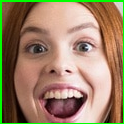

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(image_crop) 

In [ ]:
status = cv2.imwrite(imagePath + 'faces_detected.jpg', image)

In [ ]:
! pip install cleanlab


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 157 kB 12.4 MB/s 


In [ ]:
data = []
labels = []

for faceImage in os.listdir(dir_to_save):
  image = cv2.imread(dir_to_save + '/' + faceImage)
  label = faceImage.split("_")[0]
  labels.append(label)
  data.append(image)

In [ ]:
from cleanlab.classification import CleanLearning
from cleanlab.filter import find_label_issues
from sklearn.neural_network import MLPClassifier



# Option 1 - works with sklearn-compatible models - just input the data and labels ツ
label_issues_info = CleanLearning(clf=MLPClassifier).find_label_issues(data, labels)

# Option 2 - works with ANY ML model - just input the model's predicted probabilities
ordered_label_issues = find_label_issues(
    labels=labels,
    pred_probs=pred_probs,  # predicted probabilities from any model (ideally out-of-sample predictions)
    return_indices_ranked_by='self_confidence',
)

ValueError: ignored